<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#MNIST" data-toc-modified-id="MNIST-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>MNIST</a></span></li><li><span><a href="#Training-a-Binary-Classifier" data-toc-modified-id="Training-a-Binary-Classifier-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Training a Binary Classifier</a></span></li><li><span><a href="#Performance-Measures" data-toc-modified-id="Performance-Measures-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Performance Measures</a></span><ul class="toc-item"><li><span><a href="#Measuring-Accuracy-Using-Cross-Validation" data-toc-modified-id="Measuring-Accuracy-Using-Cross-Validation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Measuring Accuracy Using Cross-Validation</a></span></li><li><span><a href="#Confusion-Matrix" data-toc-modified-id="Confusion-Matrix-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Confusion Matrix</a></span></li><li><span><a href="#Precision-and-Recall" data-toc-modified-id="Precision-and-Recall-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Precision and Recall</a></span></li><li><span><a href="#Precision/Recall-Tradeoff" data-toc-modified-id="Precision/Recall-Tradeoff-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Precision/Recall Tradeoff</a></span></li><li><span><a href="#The-ROC-Curve" data-toc-modified-id="The-ROC-Curve-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>The ROC Curve</a></span></li></ul></li><li><span><a href="#Multiclass-Classification" data-toc-modified-id="Multiclass-Classification-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Multiclass Classification</a></span></li><li><span><a href="#Error-Analysis" data-toc-modified-id="Error-Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Error Analysis</a></span></li><li><span><a href="#Multilabel-Classication" data-toc-modified-id="Multilabel-Classication-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Multilabel Classication</a></span></li><li><span><a href="#Multioutput-Classification" data-toc-modified-id="Multioutput-Classification-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Multioutput Classification</a></span></li><li><span><a href="#Excercise-problems" data-toc-modified-id="Excercise-problems-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Excercise problems</a></span></li></ul></div>

# MNIST

In [0]:
from sklearn.datasets import fetch_openml

In [0]:
mnist = fetch_openml("mnist_784", version=1)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [4]:
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [0]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

5


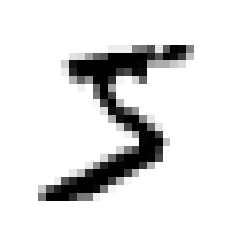

In [6]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap='binary', interpolation='nearest')
plt.axis("off")
print(y[0])
plt.show()

In [0]:
# label is a string,We prefer numbers, so let’s cast y to integers

y = y.astype(np.uint8)

In [0]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


# Training a Binary Classifier

Detecting digit 5

In [0]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

In [0]:
from sklearn.linear_model import SGDClassifier

In [12]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [13]:
sgd_clf.predict([some_digit])

array([ True])

# Performance Measures


## Measuring Accuracy Using Cross-Validation


In [0]:
# implementing cross_val_score() 

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [0]:
skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

In [16]:
for train_index ,test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


In [0]:
from sklearn.model_selection import cross_val_score

In [18]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [0]:
from sklearn.base import BaseEstimator


class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [20]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

## Confusion Matrix

In [0]:
from sklearn.model_selection import cross_val_predict

In [0]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)


In [0]:
from sklearn.metrics import confusion_matrix

In [24]:
confusion_matrix(y_train_5, y_train_pred)

# ---------PREDICTED
#          N     P
# |A|     TN    FP
# |C| N 53892   687
# |T|   
# |U| P 1891   3530
# |A|    FN     TP
# |L|

array([[53892,   687],
       [ 1891,  3530]])

## Precision and Recall

$Precision: \frac {TP}{TP+FP}$

$Recall: \frac{TP}{TP+FN} --> True\ positive\ rate\ -->\ Sensitivity$

$F1-Score: 2 * \frac{precision * recall}{precision + recall}$

$Specificity: \frac {TN}{N} = \frac{TN}{TN + FP}\ -->\ True\ negative\ rate$

$False\ positive\ rate = 1 - Specificity$

In [0]:
from sklearn.metrics import precision_score, recall_score

In [26]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [27]:
 recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [28]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

## Precision/Recall Tradeoff


Scikit-Learn does not let you set the threshold directly, but it does give you access to
the decision scores that it uses to make predictions. Instead of calling the classifier’s
predict() method, you can call its decision_function() method, which returns a
score for each instance, and then make predictions based on those scores using any
threshold you want

In [29]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [0]:
threshold = 0

In [31]:
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [32]:
# The SGDClassifier uses a threshold equal to 0

threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [0]:
# o return decision scores instead of predictions

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

Now with these scores you can compute precision and recall for all possible thresh‐
olds using the precision_recall_curve() function

In [0]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [35]:
thresholds.shape

(59966,)

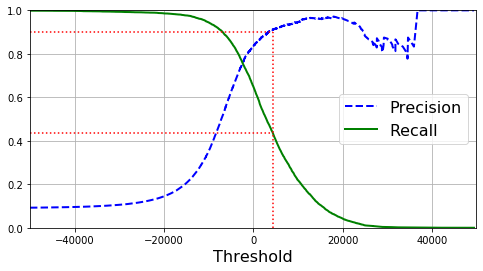

In [115]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                              
    plt.axis([-50000, 50000, 0, 1])             

plt.figure(figsize=(8, 4))                      
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([4500, 4500], [0., 0.9], "r:") 
plt.plot([-50000, 4500], [0.9, 0.9], "r:")      
plt.plot([-50000, 4500], [0.4368, 0.4368], "r:")
plt.show()

In [37]:
(y_train_pred == (y_scores > 0)).all()

True

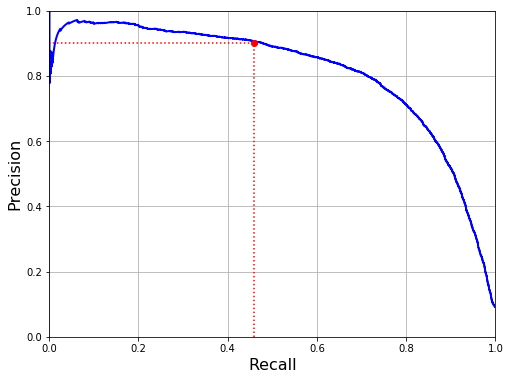

In [124]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.46, 0.46], [0., 0.9], "r:")
plt.plot([0.0, 0.46], [0.9, 0.9], "r:")
plt.plot([0.46], [0.9], "ro")
# save_fig("precision_vs_recall_plot")
plt.show()

In [0]:
# 90 % precision

threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [0]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [41]:
 precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [42]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

## The ROC Curve

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve **plots the true positive rate (another name for recall) against the false positive rate**. The FPR is the ratio of negative instances that are incorrectly classified as positive. It is equal to one minus the true negative rate, which is the ratio of negative instances that are correctly classified as negative. The TNR is also called specificity. **Hence the ROC curve plots sensitivity (recall) versus 1 – specificity**.

In [0]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholdsh = roc_curve(y_train_5, y_scores)

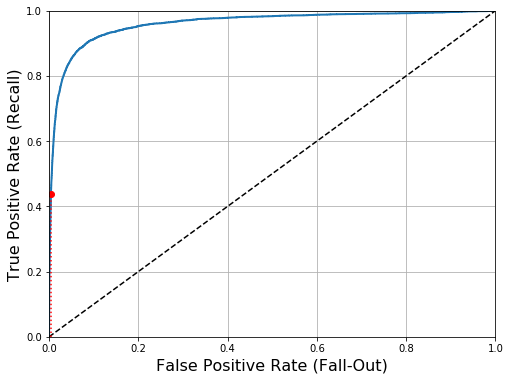

In [44]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:")
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:") 
plt.plot([4.837e-3], [0.4368], "ro")              
plt.show()

In [45]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

Since the ROC curve is so similar to the precision/recall (or PR)
curve, you may wonder how to decide which one to use. As a rule
of thumb, you should prefer the PR curve whenever the positive
class is rare or when you care more about the false positives than
the false negatives, and the ROC curve otherwise. For example,
looking at the previous ROC curve (and the ROC AUC score), you
may think that the classifier is really good. But this is mostly
because there are few positives (5s) compared to the negatives
(non-5s). In contrast, the PR curve makes it clear that the classifier
has room for improvement (the curve could be closer to the topright corner).

In [0]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5,
                                    cv=3, method="predict_proba")

In [47]:
y_probas_forest[:10]

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       [1.  , 0.  ],
       [0.99, 0.01],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.99, 0.01]])

But to plot a ROC curve, you need scores, not probabilities. A simple solution is to
use the positive class’s probability as the score

In [0]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

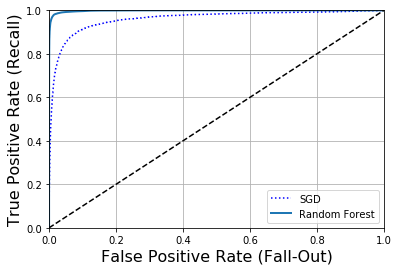

In [49]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, label='Random Forest')
plt.legend(loc="lower right")

In [50]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

# Multiclass Classification


    Some algorithms (such as Random Forest classifiers or naive Bayes classifiers) are capable of handling multiple classes directly. Others (such as Support Vector Machine classifiers or Linear classifiers) are strictly binary classifiers. However, there are various strategies that you can use to perform multiclass classification using multiple binary classifiers. For example, one way to create a system that can classify the digit images into 10 classes (from 0 to 9) is to train 10 binary classifiers, one for each digit (a 0-detector, a 1-detector, a 2-detector, and so on). Then when you want to classify an image, you get the decision score from each classifier for that image and you select the class whose classifier outputs the highest score. This is called the one-versus-all (OvA) strategy (also called one-versus-the-rest).

    Another strategy is to train a binary classifier for every pair of digits: one to distinguish 0s and 1s, another to distinguish 0s and 2s, another for 1s and 2s, and so on. This is called the one-versus-one (OvO) strategy. If there are N classes, you need to train N × (N – 1) / 2 classifiers. For the MNIST problem, this means training 45 binary classifiers! When you want to classify an image, you have to run the image through all 45 classifiers and see which class wins the most duels. The main advantage of OvO is that each classifier only needs to be trained on the part of the training set for the two classes that it must distinguish. Some algorithms (such as Support Vector Machine classifiers) scale poorly with the size of the training set, so for these algorithms OvO is preferred since it is faster to train many classifiers on small training sets than training few classifiers on large training sets. For most binary classification algorithms, however, OvA is preferred.

In [51]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [52]:
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [0]:
some_digit_scores = sgd_clf.decision_function([some_digit])

In [54]:
print(some_digit_scores)
np.argmax(some_digit_scores)

[[-31893.03095419 -34419.69069632  -9530.63950739   1823.73154031
  -22320.14822878  -1385.80478895 -26188.91070951 -16147.51323997
   -4604.35491274 -12050.767298  ]]


3

In [0]:
from sklearn.multiclass import OneVsOneClassifier

In [0]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))

In [57]:
ovo_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal',
                                           loss='hinge', max_iter=1000,
                                           n_iter_no_change=5, n_jobs=None,
                                           penalty='l2', power_t=0.5,
                                           random_state=42, shuffle=True,
                                           tol=0.001, validation_fraction=0.1,
                                           verbose=0, warm_start=False),
                   n_jobs=None)

In [58]:
ovo_clf.predict([some_digit])

array([5], dtype=uint8)

In [59]:
len(ovo_clf.estimators_)


45

In [60]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [61]:
forest_clf.predict([some_digit])


array([5], dtype=uint8)

In [62]:
forest_clf.predict_proba([some_digit])

array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])

In [63]:
 cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
y_train_pred = cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

In [0]:
# y_train_pred

# Error Analysis

In [67]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

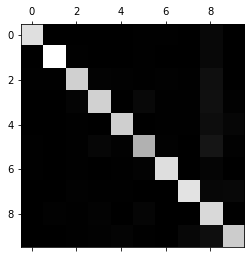

In [68]:
plt.matshow(conf_mx, cmap=plt.cm.gray)

In [0]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

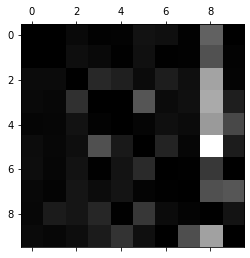

In [70]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)


In [0]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [0]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

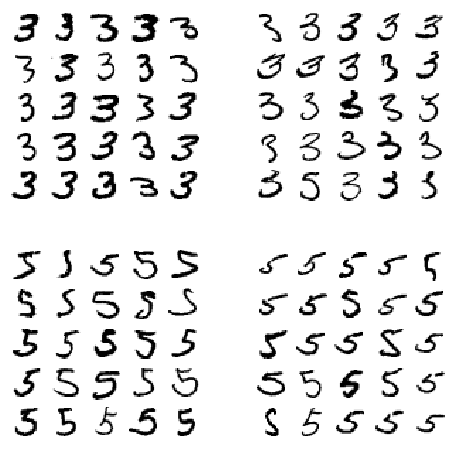

In [73]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
# save_fig("error_analysis_digits_plot")
plt.show()

# Multilabel Classication


In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [76]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [77]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [0]:
# y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
# f1_score(y_multilabel, y_train_knn_pred, average="macro")
# f1_score(y_multilabel, y_train_knn_pred, average="weighted")


# Multioutput Classification

In [0]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

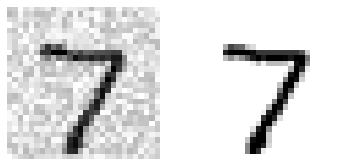

In [79]:

some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
# save_fig("noisy_digit_example_plot")
plt.show()

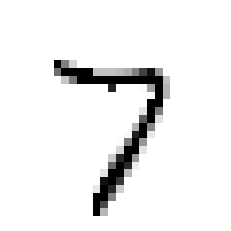

In [80]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)
# save_fig("cleaned_digit_example_plot")

In [81]:
clean_digit.shape

(1, 784)

# Excercise problems

In [0]:
# 3. Tackle the Titanic dataset

In [0]:
import pandas as pd
import os

TITANIC_PATH = os.path.join("datasets", "titanic")

def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

In [0]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [85]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The attributes have the following meaning:

1) Survived: that's the target, 0 means the passenger did not survive, while 1  means he/she survived.


2) Pclass: passenger class.

3) Name, Sex, Age: self-explanatory

4) SibSp: how many siblings & spouses of the passenger aboard the Titanic.

5) Parch: how many children & parents of the passenger aboard the Titanic.

6) Ticket: ticket id

7) Fare: price paid (in pounds)

8) Cabin: passenger's cabin number

9) Embarked: where the passenger embarked the Titanic



In [86]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [87]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [88]:
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [89]:
train_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [90]:
train_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [91]:
train_data["Embarked"].value_counts()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [0]:
# to select specific attributes from the DataFrame

from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names]

In [0]:
# numerical pipeline

In [0]:

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(["Age", "SibSp", "Parch", "Fare"])),
        ("imputer", SimpleImputer(strategy="median")),
    ])

In [95]:
num_pipeline.fit_transform(train_data)

array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [28.    ,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

In [0]:
# We will also need an imputer for the string categorical columns
# Inspired from stackoverflow.com/questions/25239958

class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)
        

In [0]:
from sklearn.preprocessing import OneHotEncoder

In [0]:
# Now we can build the pipeline for the categorical attributes:

cat_pipeline = Pipeline([
    ("select_cat", DataFrameSelector(["Pclass", "Sex", "Embarked"])),
    ("imputer", MostFrequentImputer()),
    ("cat_encoder", OneHotEncoder(sparse=False)),
])

In [99]:
cat_pipeline.fit_transform(train_data)

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [0]:
num_feat = ["Age", "SibSp", "Parch", "Fare"]
cat_feat = ["Pclass", "Sex", "Embarked"]

In [0]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [102]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_train[0, :]

array([22.  ,  1.  ,  0.  ,  7.25,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,
        0.  ,  0.  ,  1.  ])

In [0]:
y_train = train_data["Survived"]

In [104]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [105]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [0]:
X_test = preprocess_pipeline.transform(test_data)
X_test
y_pred = svm_clf.predict(X_test)

In [107]:
from sklearn.model_selection import cross_val_score

svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.7329588014981274

In [108]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.8126466916354558

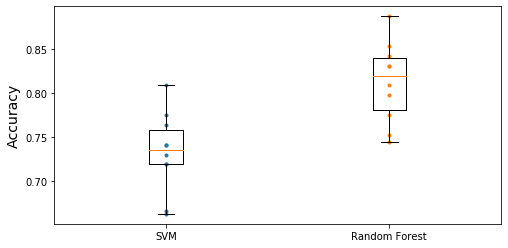

In [109]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], labels=("SVM","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()